Use a database from your choice and train an MLP Classifier on it.  Change values of alpha (regularization term) as well as the Change values of alpha (regularization term) as well as the number of hidden layers and number of units per layers

Database (Iris) avaliable at: https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


The chosen database was Iris. The data set consists of samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals. 

In [2]:
df = pd.read_csv('iris_data.txt', sep = ",", header=None, names=["sep_len", "sep_width", "pet_len","pet_width","class"])
df.head()

,sep_len,sep_width,pet_len,pet_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
Y = df['class']
X = df.drop(['class'], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25)

In [5]:
#Checking the accuracy for alpha = 1
mlp = MLPClassifier(solver='lbfgs', alpha=1,
                    hidden_layer_sizes=(5, 2), 
                    random_state=1)

mlp.fit(X_train, y_train)

print("Accuracy (training set): {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy (test set): {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy (training set): 0.982
Accuracy (test set): 0.974


In [6]:
predictions = mlp.predict(X_test)
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.93      0.96        14

      micro avg       0.97      0.97      0.97        38
      macro avg       0.98      0.98      0.98        38
   weighted avg       0.98      0.97      0.97        38



In [7]:
#Checking the accuracy for alpha = 15

mlp = MLPClassifier(solver='lbfgs', alpha=15,
                    hidden_layer_sizes=(5, 2), 
                    random_state=1)

mlp.fit(X_train, y_train)

print("Accuracy (training set): {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy (test set): {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy (training set): 0.357
Accuracy (test set): 0.263


In [8]:
#Comparing the previous result with a Classifier with only 2 features ("pet_len", "pet_width")
Xs = df.drop(['pet_len','pet_width','class'], axis=1)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, Y, test_size= 0.25)


mpl = MLPClassifier(solver='lbfgs', alpha=1,
                    hidden_layer_sizes=(5, 2), 
                    random_state=1)


mlp.fit(Xs_train, ys_train)
print("Accuracy (training set): {:.3f}".format(mlp.score(Xs_train, ys_train)))
print("Accuracy (test set): {:.3f}".format(mlp.score(Xs_test, ys_test)))

Accuracy (training set): 0.357
Accuracy (test set): 0.263


From the results above we conclude that the features pet_len and pet_width aren't good to predict by itself the the correct class

In [9]:
#Comparing the previous result with a Classifier with only 2 features ("set_len", "set_width")
Xp = df.drop(['sep_len','sep_width','class'], axis=1)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, Y, test_size= 0.25)

mlp = MLPClassifier(solver='lbfgs', alpha=1,
                    hidden_layer_sizes=(5, 2), 
                    random_state=1)

mlp.fit(Xp_train, yp_train)
print("Accuracy (training set): {:.3f}".format(mlp.score(Xp_train, yp_train)))
print("Accuracy (test set): {:.3f}".format(mlp.score(Xp_test, yp_test)))

Accuracy (training set): 0.955
Accuracy (test set): 0.974


From the results above we conclude that the features pet_len and pet_width can predict by itself the the correct class with a very good accuracy

Varying the number of layers:

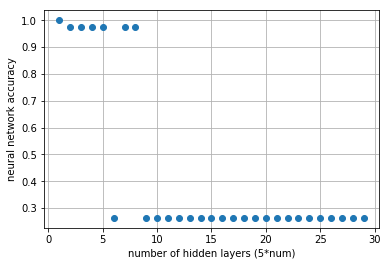

In [10]:
scores = []

# layers
numbers = range(1,30)

# loop through the different numbers of layers
for num in numbers:
    mlp = MLPClassifier(solver='lbfgs', random_state=1, alpha=1, max_iter = 100, hidden_layer_sizes=tuple([5] * num))
    mlp.fit(X_train,y_train)
    scores.append(mlp.score(X_test,y_test))

# plot
line = plt.figure()
plt.plot(numbers, scores, "o")
plt.xlabel("number of hidden layers (5*num)")
plt.ylabel("neural network accuracy")
plt.grid(True)
plt.show()

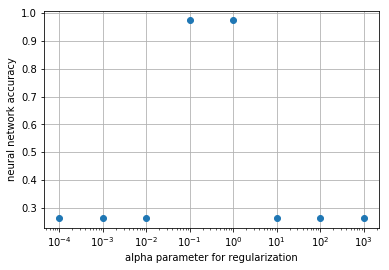

In [11]:
classifiers = []

# create range of alpha values to test
for a in [10e-5,10e-4,10e-3,10e-2,10e-1,10,10e1,10e2]:
    mpl = MLPClassifier(solver='lbfgs', alpha=a,
                    hidden_layer_sizes=(5, 2), 
                    random_state=1)
    classifiers.append(mpl)

scores = {}
for clf in classifiers:
    # fit the network
    clf.fit(X_train, y_train)
    scores[clf.alpha] = (clf.score(X_test, y_test))

# plot
line = plt.figure()
plt.plot(list(scores.keys()), list(scores.values()), "o")
plt.semilogx()
plt.xlabel("alpha parameter for regularization")
plt.ylabel("neural network accuracy")
plt.grid(True)
plt.show()

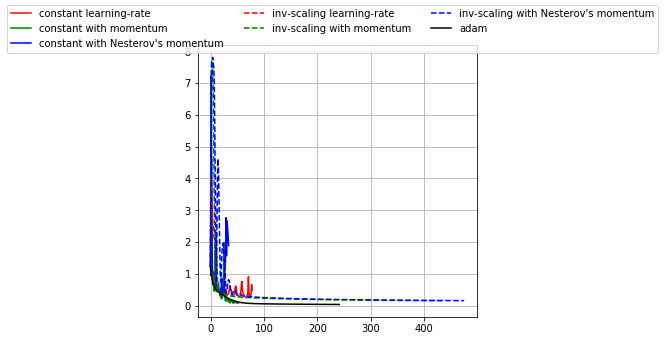

In [12]:
#Source: https://anaconda.org/anaconda-enterprise/neural-networks/notebook

from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

# labels for each collection of parameters
labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

# plotting arguments
plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

# plot the results
fig, axes = plt.subplots(1,1, figsize=(5, 5))
mlps = []
X = MinMaxScaler().fit_transform(X_train)

# loop through each set of parameters
for label, param, args in zip(labels, params, plot_args):
    mlp = MLPClassifier(verbose=0, random_state=0, max_iter = 1000, **param)
    mlp.fit(X_train, y_train)
    mlps.append(mlp)
    axes.plot(mlp.loss_curve_, **args)

# show the plot
fig.legend(labels=labels, ncol=3, loc="upper center")
plt.grid(True)
plt.show()